<a href="https://colab.research.google.com/github/Vaibhavgoel123/Artificial-Intelligence/blob/Pytorch/Pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/')

import untitled2
import importlib
importlib.reload(untitled2)

print("Successfully imported and reloaded untitled2!")

Successfully imported and reloaded untitled2!


In [5]:
torch.manual_seed(42)

In [6]:
#Combined dataset: bikes for short distances, car for longer ones
distances = torch.tensor([[1.0],[1.5],[2.0],[2.5],[3.0],[3.5],[4.0],[4.5],[5.0],[5.5],
                             [6.0],[6.5],[7.0],[7.5],[8.0],[8.5],[9.0],[9.5],[10.0],[10.5],[11.0],[11.5],
                             [12.0],[12.5],[13.0],[13.5],[14.0],[14.5],[15.0],[15.5],[16.0],[16.5],[17.0],
                             [17.5],[18.0],[18.5],[19.0],[19.5],[20.0]],dtype=torch.float32)

#Combined delivery times
times = torch.tensor([[6.96],[9.67],[12.11],[14.56],[16.77],[21.7],[26.52],[32.47],[37.15],[42.35],
                          [46.1],[52.98],[57.76],[61.29],[66.15],[67.63],[69.45],[71.57],[72.8],[73.88],
                          [76.34],[76.38],[78.34],[80.07],[81.86],[84.45],[83.98],[86.55],[88.33],[86.83],
                          [89.24],[88.11],[88.16],[91.77],[92.27],[92.13],[90.73],[90.39],[92.98]],dtype=torch.float32)

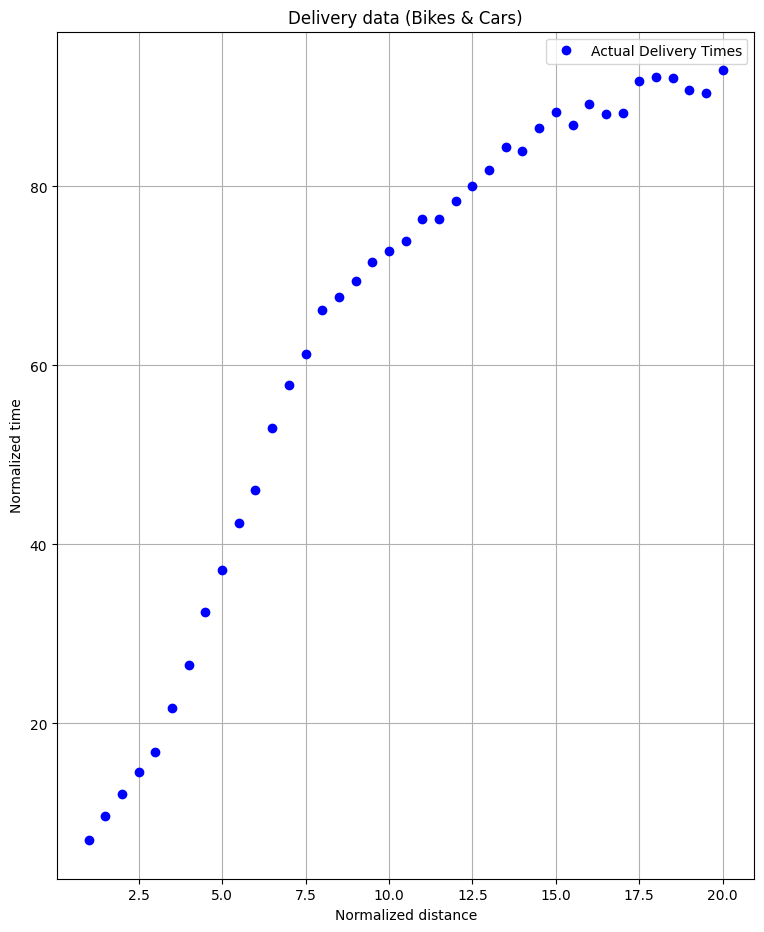

In [7]:
untitled2.plot_data(distances, times)

In [8]:
#Calculate mean and standard deviation
distances_mean = distances.mean()
distances_std = distances.std()

#Calculate mean and standard deviation of time
times_mean = times.mean()
times_std = times.std()

#Apply standardization to the distances
distances_norm = (distances - distances_mean) / distances_std

#Apply standardization to the times.
times_norm = (times - times_mean) / times_std

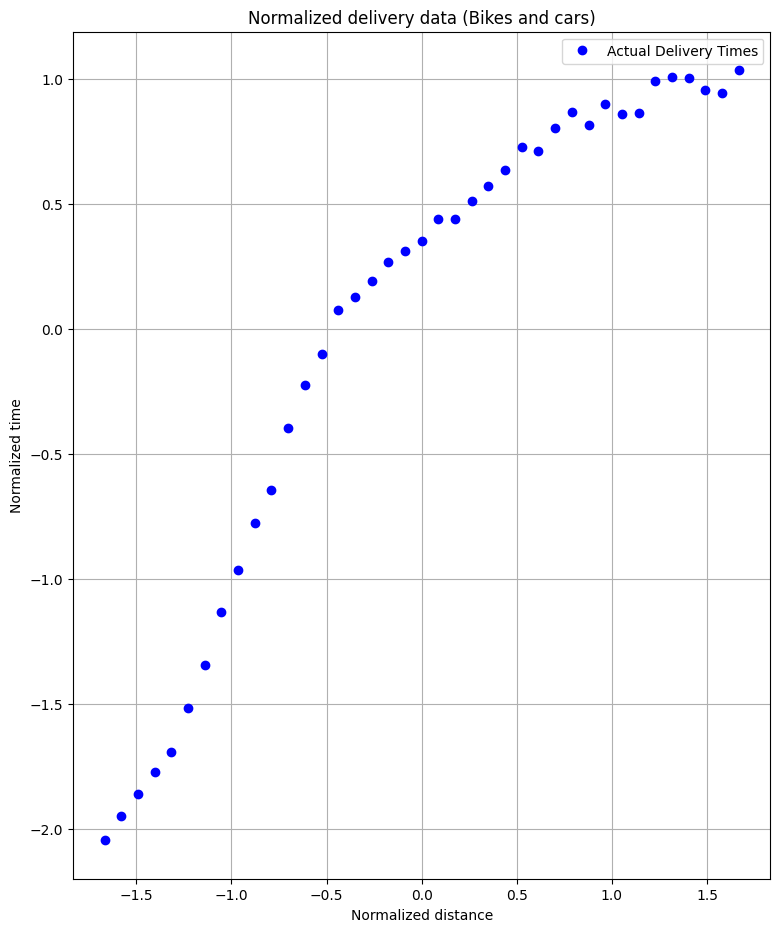

In [9]:
untitled2.plot_data(distances_norm, times_norm, normalize=True)

In [10]:
print(f"NaN values in distances_norm: {torch.isnan(distances_norm).any()}")
print(f"NaN values in times_norm: {torch.isnan(times_norm).any()}")

NaN values in distances_norm: False
NaN values in times_norm: False


In [11]:
#This line ensures that your results are reproducible and consistent every time
torch.manual_seed(27)

model = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

In [12]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

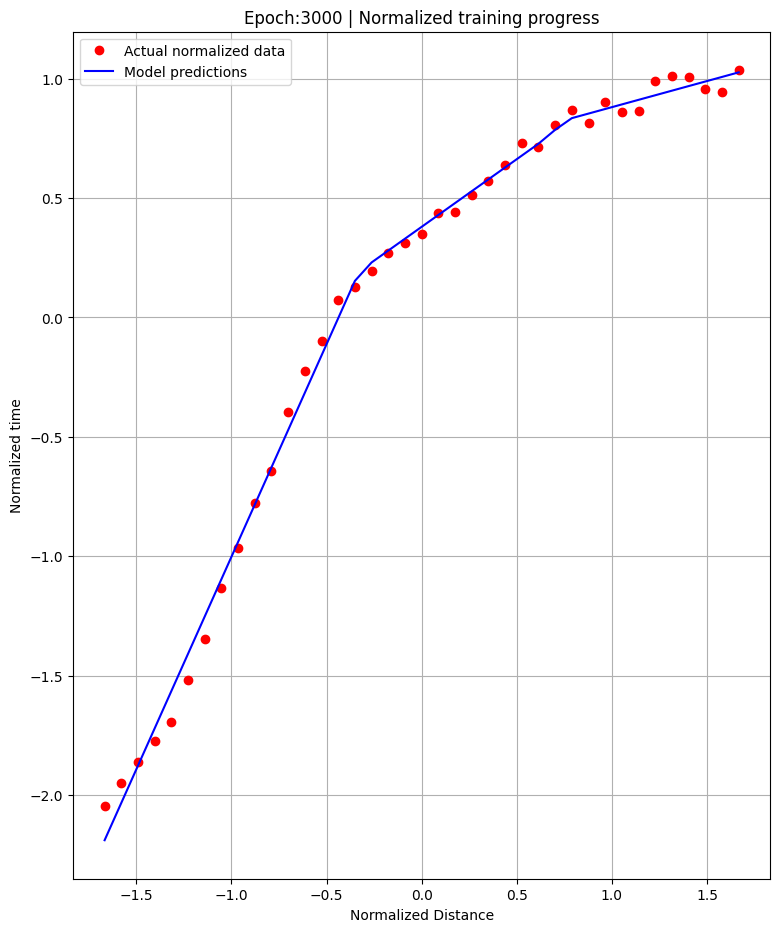


Training Complete
Final Loss: 0.0031437124125659466


In [13]:
for epoch in range(3000):
  #Resetting optimizer gradient
  optimizer.zero_grad()
  #Make predictions(Forward pass)
  outputs = model(distances_norm)
  #Loss calculation
  loss = loss_function(outputs, times_norm)
  #Calculate errors(Backward pass)
  loss.backward()
  #Update model parameters
  optimizer.step()
  #Print loss every 50 epochs
  if(epoch+1)%50==0:
    untitled2.plot_training_progress(
        epoch = epoch,
        loss = loss,
        model = model,
        distances_norm = distances_norm,
        times_norm = times_norm
    )
  print("\nTraining Complete")
  print(f"Final Loss: {loss.item()}")

In [16]:
distance_to_predict = 2.5

In [17]:
with torch.no_grad():
  #Normalize input distance
  distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
  new_distance_norm = (distance_tensor - distances_mean) / distances_std

  #Get normalized prediction
  predicted_time_norm = model(new_distance_norm)

  #De-normalize the output
  predicted_time_actual = (predicted_time_norm * times_std) + times_mean

  #Decision making logic
  print(f"Prediction for {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

  #Check if delivery is possible in 45 minutes delivery time frame
  if predicted_time_actual.item()>45:
    print("\nDecision: Do not promise the delivery under 45 minutes")
  else:
    if distance_to_predict<=3:
      print(f"\nDecision: Yes delivery is possible. Since the distance is {distance_to_predict}-miles (<=3 miles), use a bike.")
    else:
      print(f"\nDecision: Yes delivery is possible. Since the distance is {distance_to_predict}-miles (>3 miles), use a car.")

Prediction for 2.5-mile delivery: 16.0 minutes

Decision: Yes delivery is possible. Since the distance is 2.5-miles (<=3 miles), use a bike.
